x_train: (50000, 32, 32, 3)
x_train: (50000, 3072)
w1: (3072, 200)
b1: (200,)
iteration : 0/300  , loss: 1.000001  accuracy: 0.100000 
iteration : 10/300  , loss: 1.117288  accuracy: 0.099640 
iteration : 20/300  , loss: 0.847885  accuracy: 0.268640 
iteration : 30/300  , loss: 0.837919  accuracy: 0.287160 
iteration : 40/300  , loss: 0.829468  accuracy: 0.309900 
iteration : 50/300  , loss: 0.818853  accuracy: 0.339340 
iteration : 60/300  , loss: 0.817097  accuracy: 0.340820 
iteration : 70/300  , loss: 0.804454  accuracy: 0.363580 
iteration : 80/300  , loss: 0.797138  accuracy: 0.375580 
iteration : 90/300  , loss: 0.787203  accuracy: 0.394180 
iteration : 100/300  , loss: 0.795975  accuracy: 0.376120 
iteration : 110/300  , loss: 0.789965  accuracy: 0.386360 
iteration : 120/300  , loss: 0.776801  accuracy: 0.404000 
iteration : 130/300  , loss: 0.774902  accuracy: 0.408000 
iteration : 140/300  , loss: 0.769337  accuracy: 0.420340 
iteration : 150/300  , loss: 0.778912  accuracy:

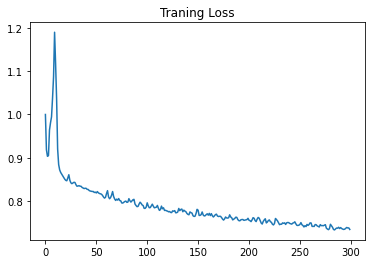

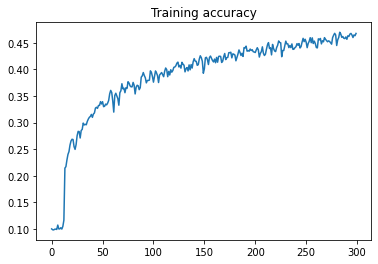

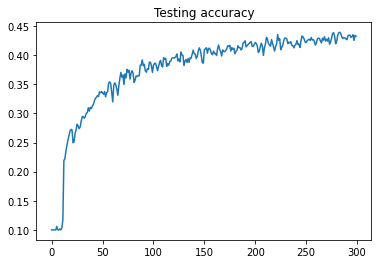

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
# x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train:', x_train.shape)

std=1e-6
H=200
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices = np.random.choice(Ntr,batch_size)
    x_tr=x_train[batch_indices]
    y_tr=y_train[batch_indices]

    # Forward pass
    h_tr=1.0/(1.0 + np.exp(-np.matmul(x_tr,w1)-b1))
    y_pre=np.matmul(h_tr,w2) + b2
    loss=(1/batch_size)*np.square(y_pre-y_tr).sum()  + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    
    # Backward pass
    dy_pre =(1/batch_size)*2.0*(y_pre-y_tr) #derivative of loss with respect to y_pre
    dw2= np.matmul(h_tr.T,dy_pre) +reg*w2  #derivative of loss with respect to w2
    db2=dy_pre.sum(axis=0)  #derivative of loss with respect to b2
    dh=np.matmul(dy_pre,w2.T)
    dw1= np.matmul(x_tr.T,dh*h_tr*(1-h_tr)) +reg*w1   #derivative of loss with respect to w1
    db1=(dh*h_tr*(1-h_tr)).sum(axis=0)        #derivative of loss with respect to b1
    w1-=lr*dw1 #update w1
    w2-=lr*dw2  #update w2
    b1-=lr*db1  #update b1
    b2-=lr*db2  #update b2
    lr*=lr_decay    #update lr

    #traning accuracies
    train_acc=1.0 -(1/batch_size)*np.count_nonzero((np.argmax(y_tr,axis=1) - np.argmax(y_pre,axis=1)))
    train_acc_history.append(train_acc)

    #testing accuracies
    h_test=1.0/(1.0 + np.exp(-np.matmul(x_test,w1)-b1))
    y_test_pre=np.matmul(h_test,w2) + b2
    test_acc= 1.0 - (1/Nte)*np.count_nonzero((np.argmax(y_test,axis=1) - np.argmax(y_test_pre,axis=1)))
    val_acc_history.append(test_acc)

    if t % 10==0:
        print('iteration : %d/%d  , loss: %f  accuracy: %f '% (t,iterations,loss,train_acc))


# Printing accuracies and displaying w as images
plt1=plt.figure(1)
plt.plot(loss_history)
plt.title('Traning Loss')
plt2=plt.figure(2)
plt.plot(train_acc_history)
plt.title('Training accuracy')
plt3=plt.figure(3)
plt.plot(val_acc_history)
plt.title('Testing accuracy')
print('Traning Loss: %f'%(loss_history[-1]))
print('Training accuracy : %f'% (train_acc_history[-1]))
print('Testing accuracy : %f'% (val_acc_history[-1]))


